## Converting points into a continuum

Viewing spatial data as a continuum, for example as a cell density function, can provide a new perspective on your data. Here, we show how to use [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) to convert point data into a continuous form.

We first load an example dataset, and focus on one population - let's say, cells with Celltype 'A':

MuSpAn domain loaded successfully. Domain summary:
Domain name: Exclusion
Number of objects: 2166
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

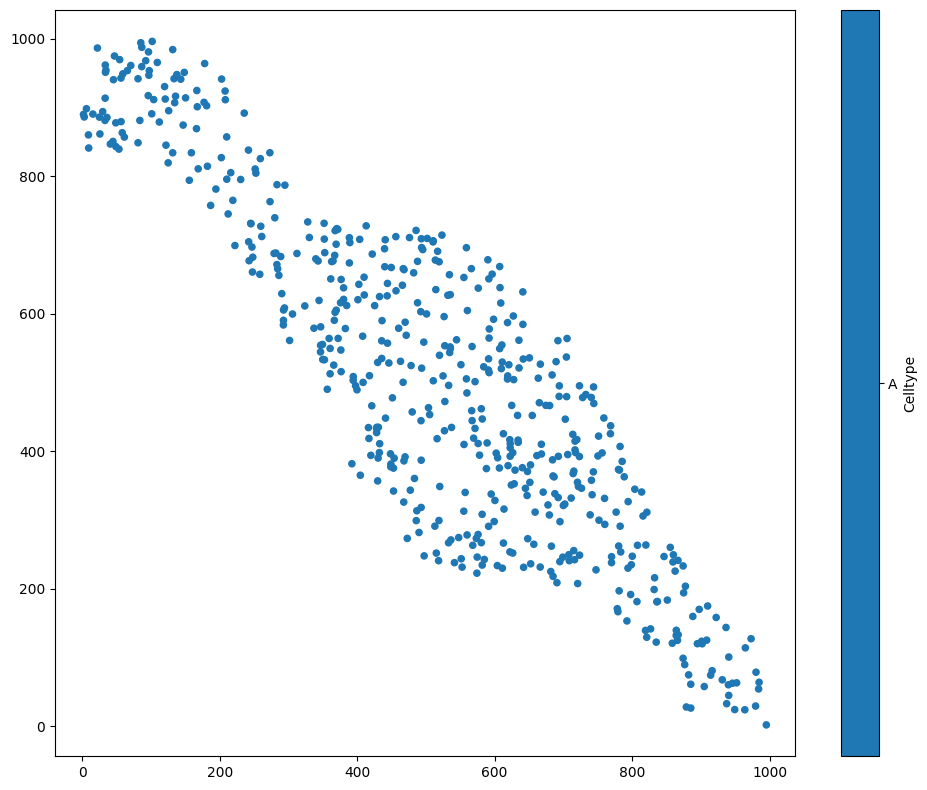

In [1]:
# Import necessary libraries for analysis
import muspan as ms 
import numpy as np
import matplotlib.pyplot as plt

# Set a fixed seed for reproducibility
np.random.seed(0)

# Load an example dataset
domain = ms.datasets.load_example_domain('Synthetic-Points-Exclusion')

# Visualise the domain, focusing on 'Celltype' and plotting objects of 'Celltype' 'A'
ms.visualise.visualise(domain, 'Celltype', objects_to_plot=('Celltype', 'A'))

A [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) is a process where we place a kernel - some continuous function - on top of each point. 
Let's consider a 1D example first, before we come back to our data. We'll choose some 1D points (i.e., $x$-coordinates), and add a kernel to each one to obtain an estimation of the point density. We'll use a Gaussian kernel, the most common kind. This means that for each of our data points, we'll add a Gaussian curve on top.

(0.0, 1.0)

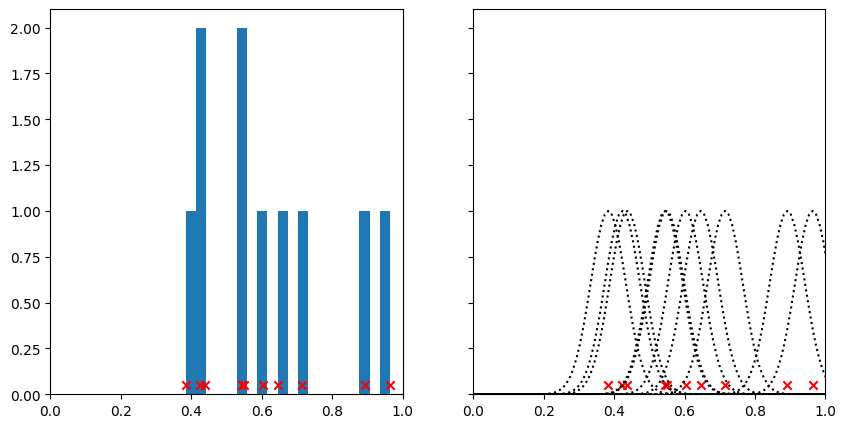

In [2]:
# Generate 10 random points between 0 and 1
points = np.random.rand(10)

# Create a figure with 2 subplots, sharing x and y axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Plot histogram of points on the first subplot
plt.sca(axes[0])
plt.hist(points, bins=20)
plt.scatter(points, 0 * points + 0.05, c='r', marker='x')

# Define a function to plot a Gaussian curve centered at x
def plot_gaussian(x):
    vals = np.linspace(x - 1, x + 1, 201)
    sd = 0.05
    gauss = np.exp((-(vals - x) ** 2) / (2 * sd ** 2))
    plt.plot(vals, gauss, c='k', linestyle=':')

# Plot Gaussian curves for each point on the second subplot
plt.sca(axes[1])
for point in points:
    plot_gaussian(point)
plt.scatter(points, 0 * points + 0.05, c='r', marker='x')
plt.xlim([0, 1])

On the left hand side here, we've plotted our points together with a histogram. Notice how when many points are close together, the peaks of the histogram are higher. This histogram in some sense describes the density of points along the line, but it's a bit jagged and the height of the bins is sensitive to where we draw the bin edges.

On the right hand side, we can see the kernels that we've put on top of each point. By changing the standard deviation of the kernel, we could make these narrower or broader, just as we could change the look of the histogram by changing the width of the bins. Watch what happens when we add all the kernels together.

(0.0, 1.0)

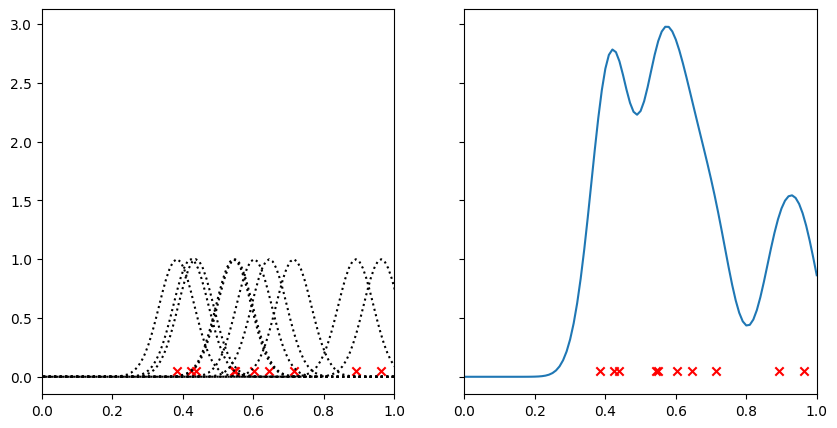

In [3]:
# Create a figure with 2 subplots, sharing x and y axes
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Plot Gaussian curves for each point on the first subplot
plt.sca(ax[0])
for point in points:
    plot_gaussian(point)
plt.scatter(points, 0 * points + 0.05, c='r', marker='x')
plt.xlim([0, 1])

# Define a function to add a Gaussian curve to the sum
def add_gaussian_to_sum(xrange, sum, x):
    sd = 0.05
    gauss = np.exp((-(xrange - x) ** 2) / (2 * sd ** 2))
    sum += gauss
    return sum

# Initialize the range and sum for the Gaussian curves
xrange = np.linspace(0, 1, 101)
sum = np.zeros(len(xrange))

# Add Gaussian curves for each point to the sum on the second subplot
plt.sca(ax[1])
for point in points:
    sum = add_gaussian_to_sum(xrange, sum, point)
plt.scatter(points, 0 * points + 0.05, c='r', marker='x')
plt.plot(xrange, sum)
plt.xlim([0, 1])

Where there are points close together, the kernels have reinforced one another to leave a large peak. Regions with few points have a low value. Compare this graph with the histogram above - we can think of this as being almost a continuous version of it.

Let's see what this looks like in 2D. Instead of adding a 1D Gaussian, we'll add a 2D Gaussian to each point.

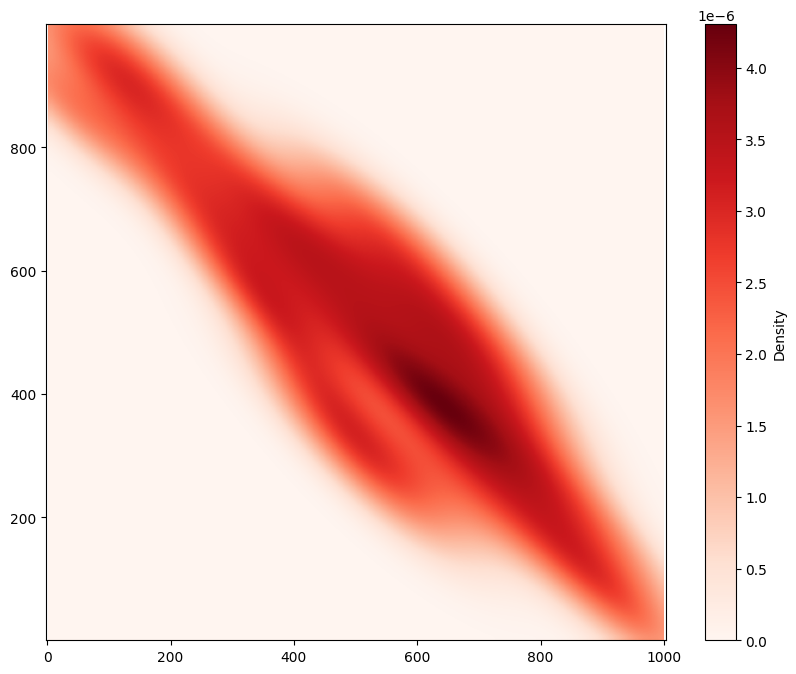

In [4]:
# Perform kernel density estimation on the domain for the population of 'Celltype' 'A'
# The result is visualised automatically
kde = ms.distribution.kernel_density_estimation(
    domain,
    population=('Celltype', 'A'),
    visualise_output=True
)

Using MuSpAn's `ms.distribution.kernel_density_estimation()`, we've successfully visualised a continuum representation of the density of Celltype 'A' across the region. Notice that this has been normalised, so we can interpret it as a probability density function. If you don't want to use a Gaussian kernel, you can instead use `ms.distribution.generate_distribution()` to specify custom kernels, as well as alternative methods for normalisation.